### Import Stat tools

In [1]:
# IMPORT STAT TOOLS
from pandas import Series, DataFrame
from os import walk
import pandas as pd

### Setting variables

In [2]:
input_filepath = 'D:\\Data3\\'

### Getting files list

In [3]:
all_files = []
for (dirpath, dirnames, filenames) in walk(input_filepath):
    all_files.extend(filenames)
    break

### Selecting only CSV files

In [4]:
csv_files = []
for filename in all_files:
    if '.pcap.csv' in filename:
        csv_files.append(filename)

### Parsing CSV files

In [5]:
main_dframe = DataFrame()
index = 0
dframe_list = []

for filename in csv_files:
    index += 1
    print('|', end='')
    if index%80 == 0:
        print()
    
    # READ FILE AND APPEND
    dframe = pd.read_csv(input_filepath + filename, index_col=None, header=0)
    dframe_list.append(dframe)
    
main_dframe = pd.concat(dframe_list)

print('\nFiles processed:', index)

|||||||||
Files processed: 9


### Quartile calculations

In [6]:
main_dframe.head()

,frame.number,frame.time_epoch,frame.len,ip.src,ip.dst,ip.ttl,tcp.srcport,tcp.dstport,tcp.flags,tcp.seq,tcp.stream,udp.srcport,udp.dstport,icmp.type,icmp.code
0,1,1331901000,117,192.168.229.254,192.168.202.79,254,443,46117,24,1,0,NaN,NaN,NaN,NaN
1,2,1331901000,269,192.168.202.79,192.168.229.254,64,46117,443,24,1,0,NaN,NaN,NaN,NaN
2,3,1331901000,70,192.168.202.79,192.168.229.251,64,50463,80,17,1,1,NaN,NaN,NaN,NaN
3,4,1331901000,70,192.168.229.254,192.168.202.79,254,443,46117,16,48,0,NaN,NaN,NaN,NaN
4,5,1331901000,78,192.168.202.79,192.168.229.251,64,50465,80,2,0,2,NaN,NaN,NaN,NaN


In [7]:
frame_len = Series(main_dframe['frame.len'])


In [8]:
frame_len.sort()

In [9]:
val_list = list(frame_len.values)
len(val_list)

8635943

In [10]:
median_index = int(len(val_list)/2)
median_value = val_list[median_index]

print('median index:', median_index)
print('median value:', median_value)

median index: 4317971
median value: 64


In [11]:
lower = list(val_list[:int(len(val_list)/2)])
upper = list(val_list[int(len(val_list)/2):])

In [12]:
q1_index = int(len(lower)/2)
q1_value = lower[q1_index]

print('q1 index:', q1_index)
print('q1 value:', q1_value)

q1 index: 2158985
q1 value: 64


In [13]:
q3_index = int(len(upper)/2)
q3_value = upper[q3_index]

print('q3 index:', q3_index)
print('q3 value:', q3_value)

q3 index: 2158986
q3 value: 78


### IQR value

In [14]:
iqr = q3_value - q1_value
print('IQR:', iqr)

IQR: 14


In [15]:
outliers_lower_boundry = q1_value - (1.5 * iqr)
outliers_upper_boundry = q3_value + (1.5 * iqr)

print('Outliers below:', outliers_lower_boundry)
print('Outliers above:', outliers_upper_boundry)

Outliers below: 43.0
Outliers above: 99.0


In [16]:
data = []
outliers = []

for point in val_list:
    if point < outliers_lower_boundry or point > outliers_upper_boundry:
        outliers.append(point)
    else:
        data.append(point)


In [17]:
len(outliers)

687346

### Plotting

In [18]:
# IMPORT STAT TOOLS
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# IMPORT PLOTTING
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# CHANGE FIGURE SIZE
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12

# IMPORT OTHER
import os

(array([  6.35560000e+04,   1.45580000e+04,   2.26330000e+04,
          1.26850000e+04,   1.42040000e+04,   1.29580000e+04,
          9.60400000e+03,   5.41960000e+04,   1.18540000e+04,
          3.39970000e+04,   3.42480000e+04,   2.57800000e+04,
          4.91800000e+03,   1.95500000e+03,   4.12200000e+03,
          1.08600000e+03,   3.98700000e+03,   3.99000000e+03,
          1.60540000e+04,   1.44820000e+04,   1.34610000e+04,
          8.38200000e+03,   1.59450000e+04,   7.79300000e+03,
          1.00870000e+04,   5.35600000e+03,   1.24400000e+04,
          2.72800000e+03,   1.04050000e+04,   2.27900000e+03,
          2.92400000e+03,   1.28360000e+04,   6.58700000e+03,
          1.66300000e+03,   4.47900000e+03,   1.47560000e+04,
          1.01850000e+04,   3.67700000e+03,   1.29800000e+03,
          5.51000000e+02,   3.27000000e+02,   2.42000000e+02,
          2.52000000e+02,   1.84000000e+02,   2.59000000e+02,
          2.19000000e+02,   3.22000000e+02,   1.90000000e+02,
        

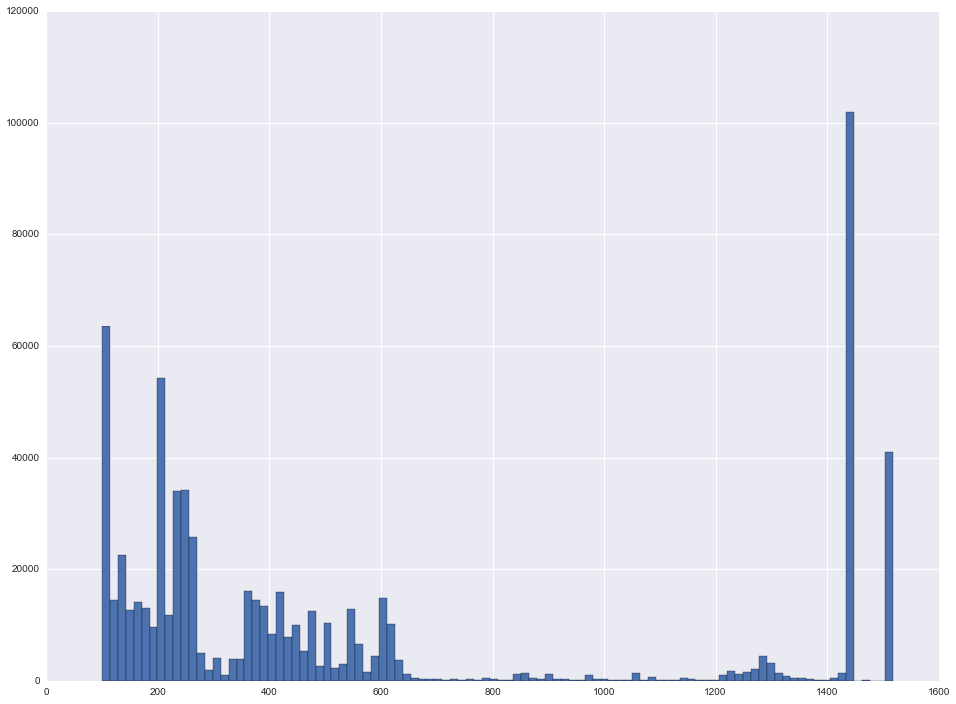

In [19]:
plt.hist(outliers, bins=100)

(array([  6.40269500e+06,   1.52701100e+06,   2.09860000e+04,
          6.53950000e+04,   1.64660000e+04,   1.89120000e+04,
          2.03460000e+04,   8.02200000e+03,   1.49600000e+04,
          7.45400000e+03,   5.89280000e+04,   1.13220000e+04,
          4.70740000e+04,   3.12870000e+04,   1.09800000e+04,
          3.38300000e+03,   3.92200000e+03,   1.45000000e+03,
          4.08500000e+03,   2.14800000e+03,   1.45500000e+04,
          1.66100000e+04,   1.36610000e+04,   8.23900000e+03,
          8.52600000e+03,   1.62050000e+04,   1.02820000e+04,
          5.58900000e+03,   1.24400000e+04,   2.72800000e+03,
          1.04050000e+04,   2.35600000e+03,   3.02200000e+03,
          1.33750000e+04,   6.24300000e+03,   1.76800000e+03,
          6.32300000e+03,   1.58780000e+04,   8.22500000e+03,
          2.76900000e+03,   9.60000000e+02,   4.11000000e+02,
          2.94000000e+02,   2.79000000e+02,   2.47000000e+02,
          2.10000000e+02,   2.55000000e+02,   2.72000000e+02,
        

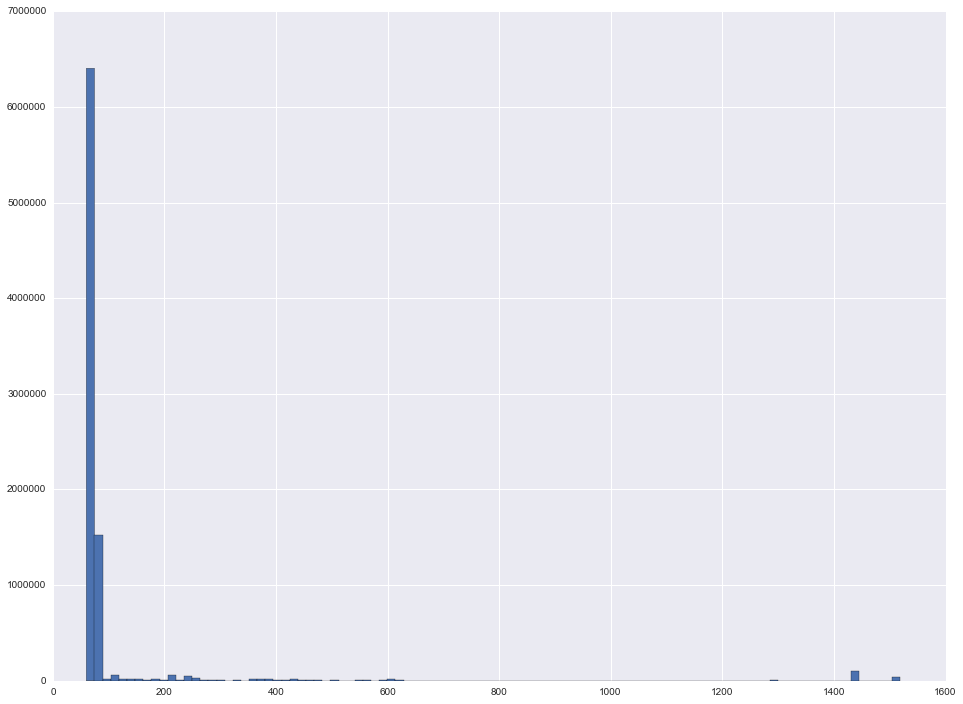

In [20]:
plt.hist(val_list, bins=100)

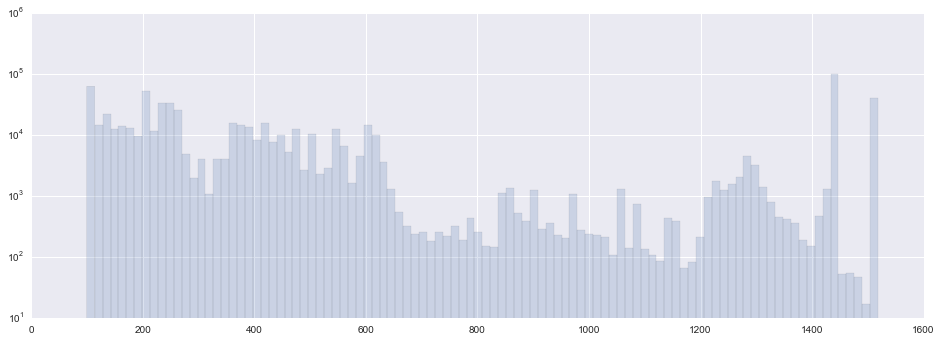

In [21]:

plt.subplot(2,1,1)
plt.hist(outliers, bins=100, alpha=0.2)
plt.yscale('log')



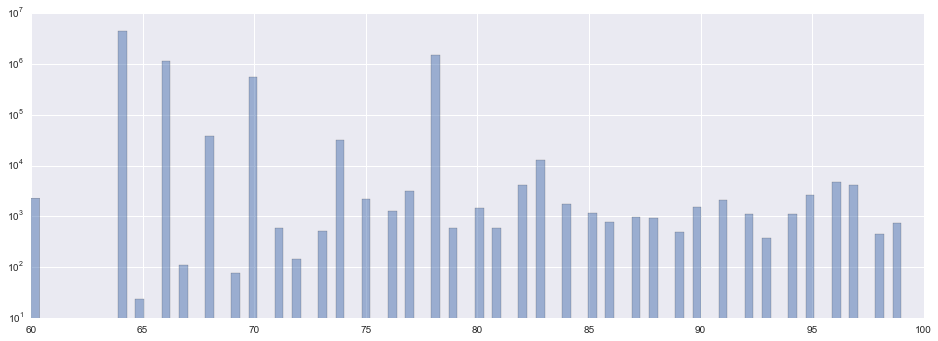

In [22]:
plt.subplot(2,1,1)
plt.hist(data, bins=100, alpha=0.5)
plt.yscale('log')

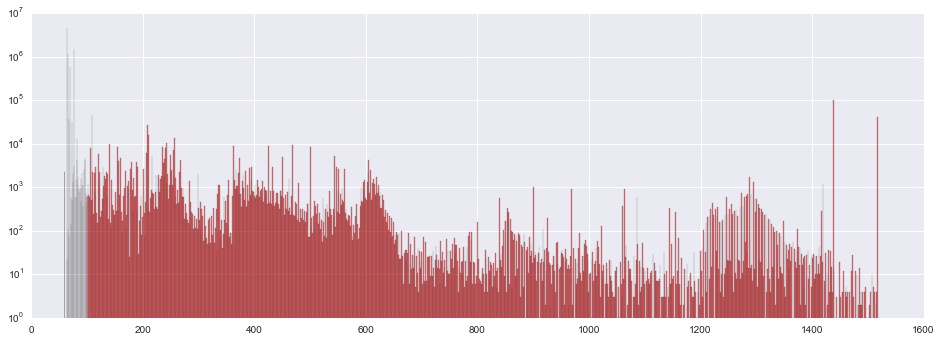

In [23]:
plt.subplot(2,1,1)

plt.hist(outliers, bins=1000, alpha=0.5, color='r')
plt.hist(data, bins=1000, alpha=0.5, color='g')
plt.yscale('log')

In [24]:
new_col = []
for value in main_dframe['frame.len']:
    if value <= outliers_lower_boundry or value >= outliers_upper_boundry:
        new_col.append(0.7)
    else:
        new_col.append(0.3)


In [25]:
len(new_col)

8635943

In [26]:
len(main_dframe['frame.len'])

8635943

In [27]:
main_dframe['outlier'] = new_col

In [28]:
main_dframe.head()

,frame.number,frame.time_epoch,frame.len,ip.src,ip.dst,ip.ttl,tcp.srcport,tcp.dstport,tcp.flags,tcp.seq,tcp.stream,udp.srcport,udp.dstport,icmp.type,icmp.code,outlier
0,1,1331901000,117,192.168.229.254,192.168.202.79,254,443,46117,24,1,0,NaN,NaN,NaN,NaN,0.7
1,2,1331901000,269,192.168.202.79,192.168.229.254,64,46117,443,24,1,0,NaN,NaN,NaN,NaN,0.7
2,3,1331901000,70,192.168.202.79,192.168.229.251,64,50463,80,17,1,1,NaN,NaN,NaN,NaN,0.3
3,4,1331901000,70,192.168.229.254,192.168.202.79,254,443,46117,16,48,0,NaN,NaN,NaN,NaN,0.3
4,5,1331901000,78,192.168.202.79,192.168.229.251,64,50465,80,2,0,2,NaN,NaN,NaN,NaN,0.3


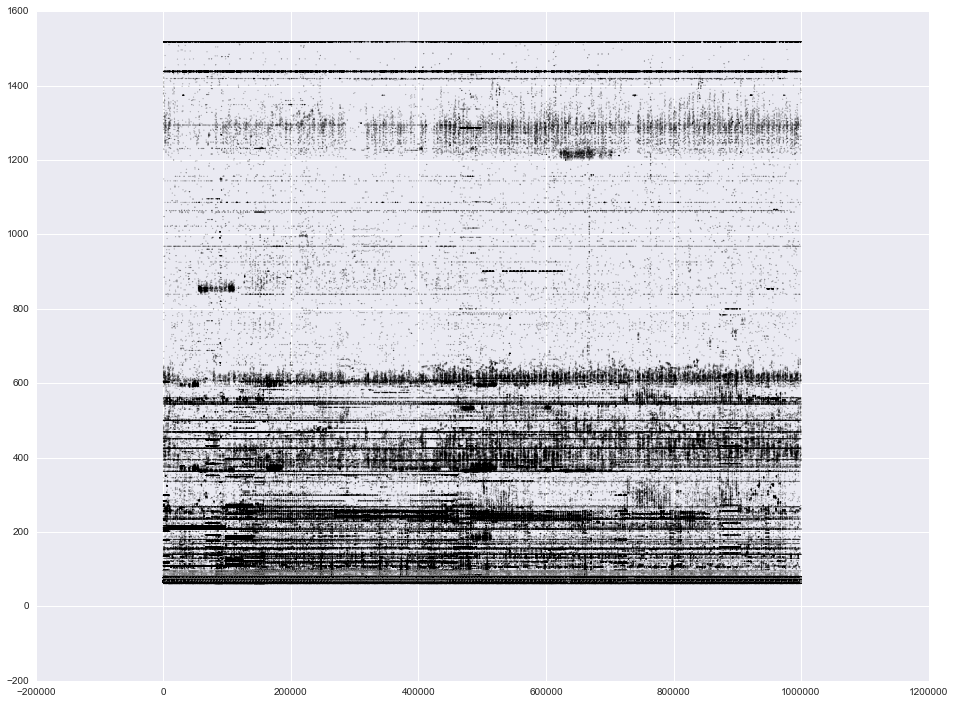

In [29]:
plt.scatter(main_dframe['frame.number'], main_dframe['frame.len'], c=main_dframe['outlier'], alpha=0.2, s=1)

(-10, 1000000)

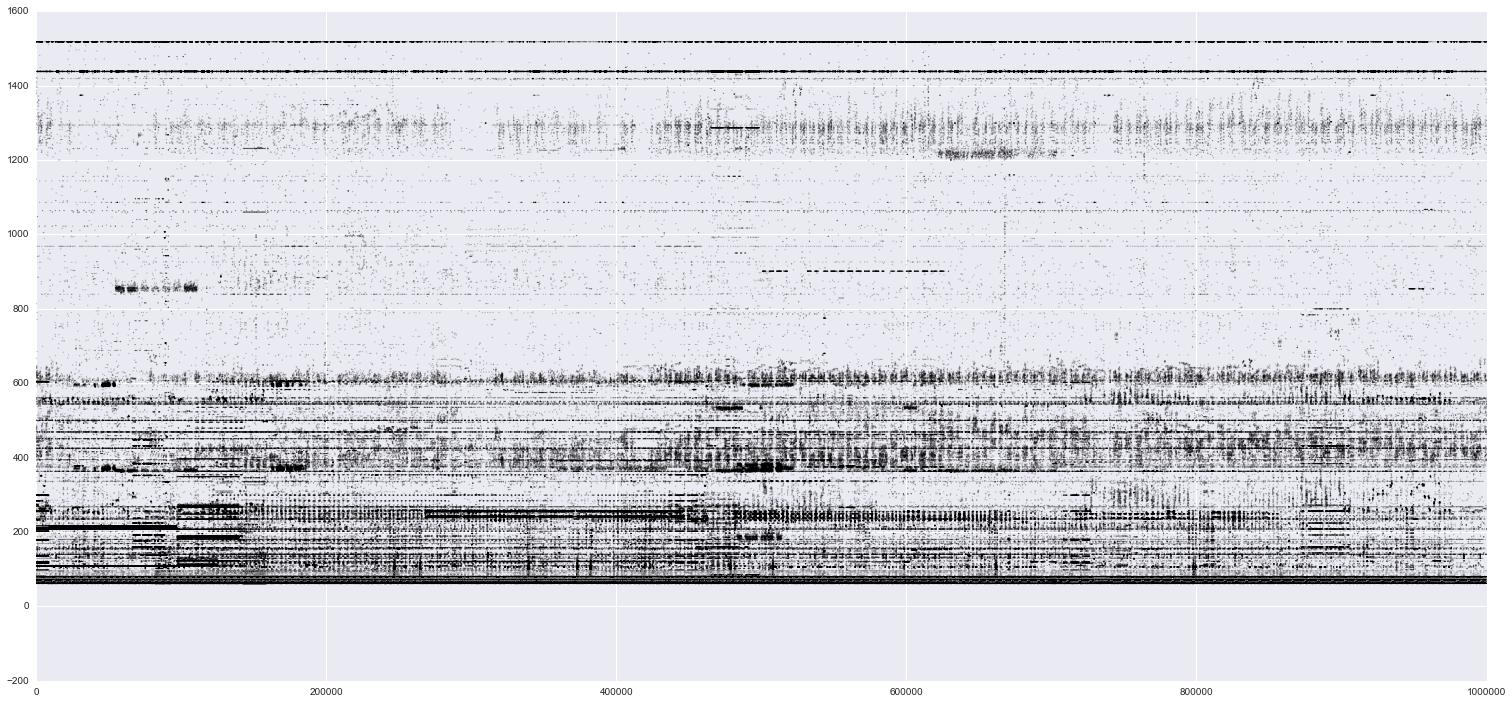

In [31]:
pylab.rcParams['figure.figsize'] = 26, 12
plt.scatter(main_dframe['frame.number'], main_dframe['frame.len'], c=main_dframe['outlier'], alpha=0.2, s=1)
plt.xlim(-10, main_dframe['frame.number'].max())

(-10, 1000000)

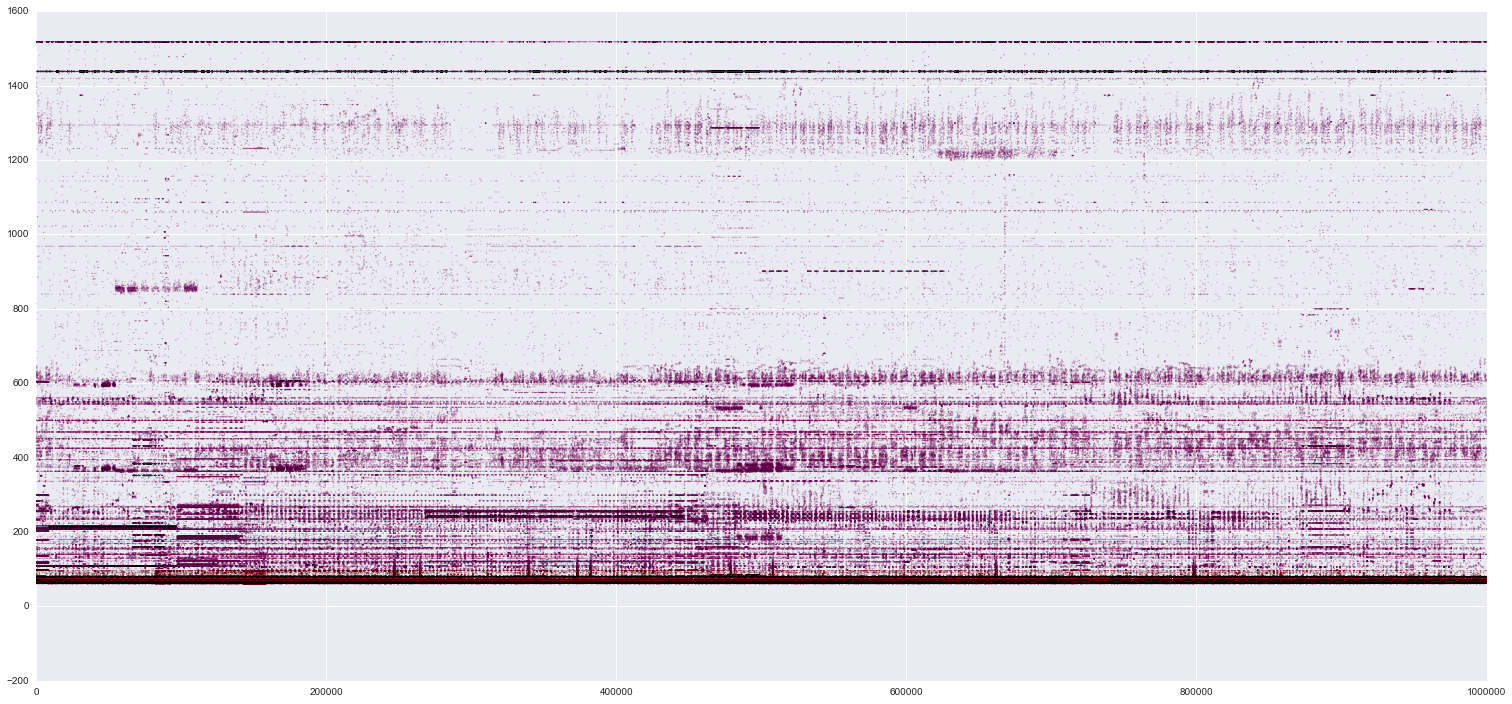

In [32]:
pylab.rcParams['figure.figsize'] = 26, 12
plt.scatter(
    main_dframe['frame.number'], 
    main_dframe['frame.len'], 
    c=main_dframe['outlier'], 
    cmap='gist_rainbow', 
    alpha=0.2, 
    s=1
)
plt.xlim(-10, main_dframe['frame.number'].max())

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    main_dframe['frame.number'], 
    main_dframe['tcp.dstport'], 
    main_dframe['frame.len'],
    c=main_dframe['outlier'], 
    cmap='gist_rainbow', 
    alpha=0.2, 
    s=1
)
plt.xlim(-10, main_dframe['frame.number'].max())
plt.savefig('num_len_dstport.jpg')
print('Figure saved')

In [ ]:
print(' ')